In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
300,ham,"Awesome, I remember the last time we got someb...",NaN,NaN,NaN
2895,spam,pdate_Now - Double mins and 1000 txts on Orang...,NaN,NaN,NaN
1057,ham,Ard 515 like dat. Y?,NaN,NaN,NaN
1419,ham,\Speak only when you feel your words are bette...,NaN,NaN,NaN
2461,ham,Anything lar...,NaN,NaN,NaN


In [60]:
df.shape

(5572, 5)

# Data Cleaning

* Removal of NAN values and cleaning datas

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Drop last 3 columns**

In [62]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
# Renaming the columns

df.rename(columns={'v1':'target','v2':"text"}, inplace = True)
df.sample(5)

,target,text
4364,ham,Ujhhhhhhh computer shipped out with address to...
1011,ham,"I just got home babe, are you still awake ?"
3114,ham,I wait 4 Ì_ inside da car park...
1713,spam,Hard LIVE 121 chat just 60p/min. Choose your g...
4395,ham,Dear :-/ why you mood off. I cant drive so i b...


# chaning ham / spam to numeric values

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [65]:
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Missing Values

In [66]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [67]:
df.duplicated().sum()

403

**Remove Duplicates**

In [68]:
df = df.drop_duplicates(keep="first")

In [69]:
df.duplicated().sum()

0

In [70]:
df.shape

(5169, 2)

# 2. EDA

In [71]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

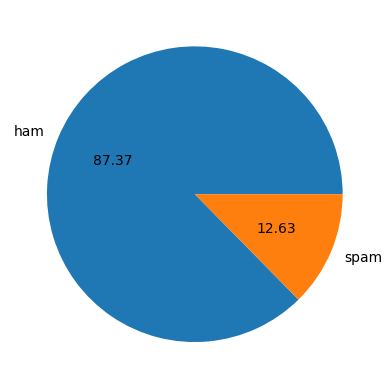

In [72]:
import matplotlib.pyplot as plt

plt.pie(df["target"].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

**Data is imbalanced as number of ham is larger than spam**

In [73]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
df['num_characters'] = df['text'].apply(len)

In [75]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Num of words**

In [76]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


**Num of sentences**

In [77]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [78]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [79]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


**For Ham messages**

In [80]:
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


**For spam msgs**

In [81]:
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


**Plot Histogram**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

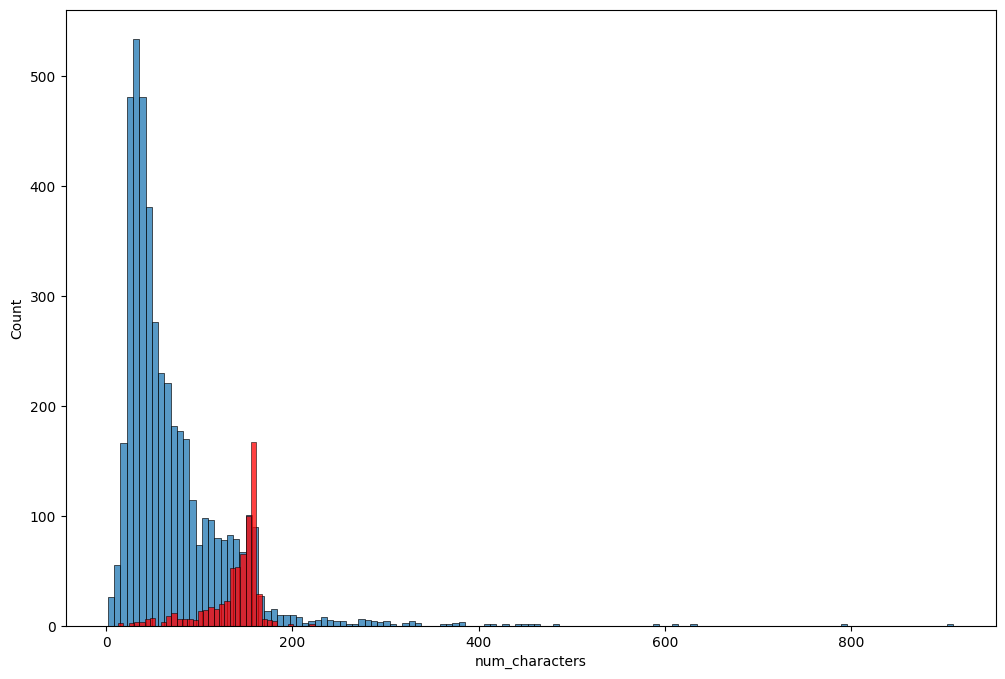

In [82]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color ="red")

* majority of ham counts uses less num_characters and viceversa

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

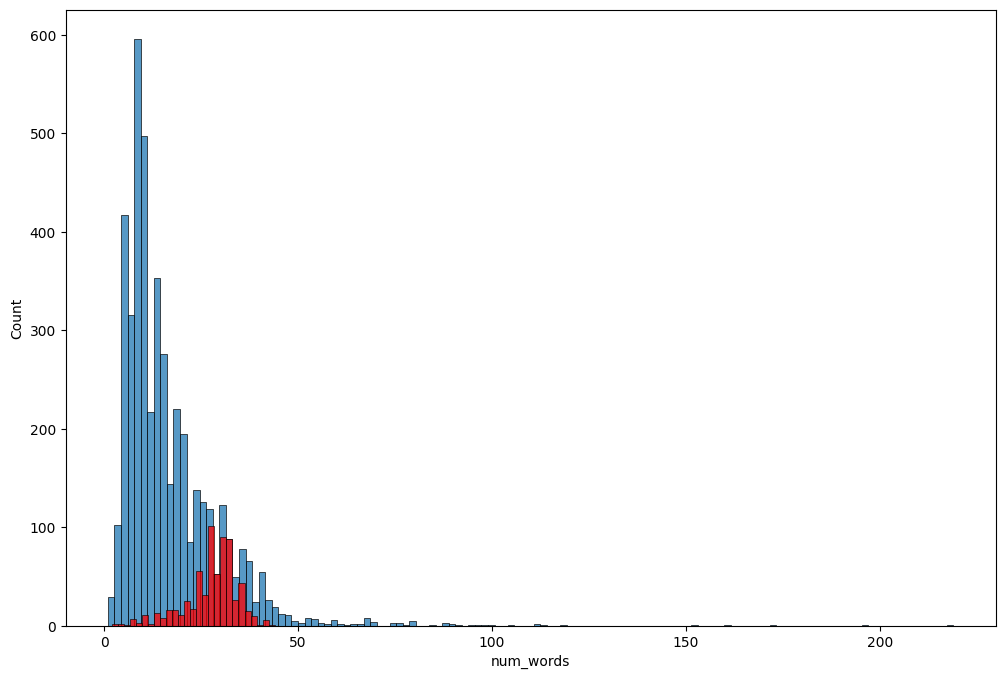

In [83]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color ="red")

* majority of ham counts uses less num_words and viceversa

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

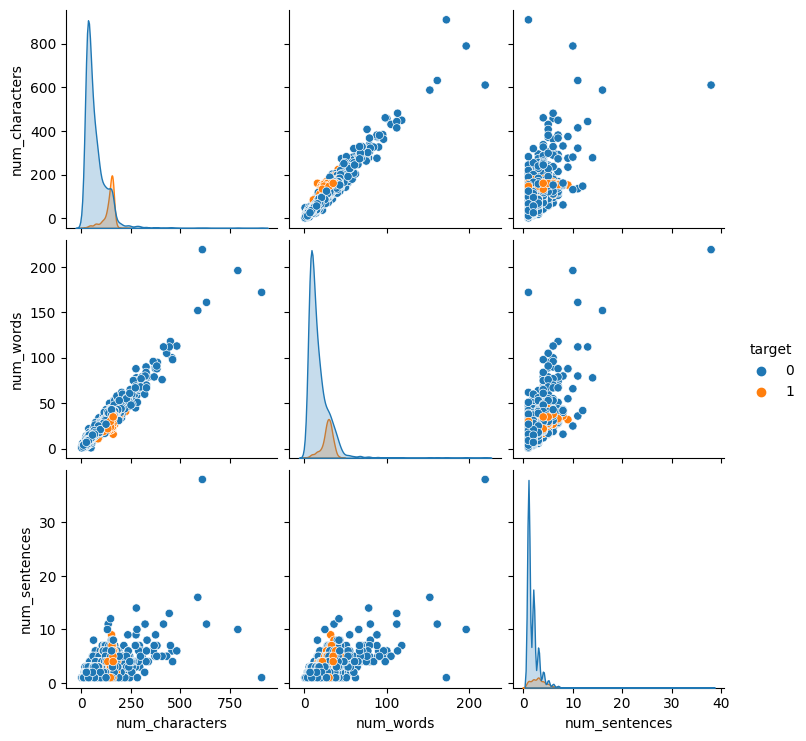

In [85]:
sns.pairplot(df,hue="target")

**Correlation Coefficient**

<Axes: >

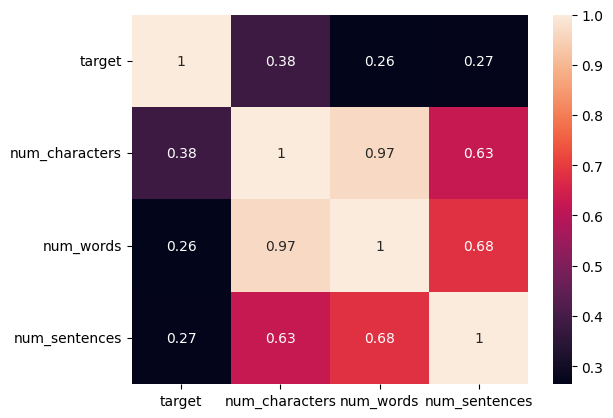

In [86]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Data Preprocessing


1.  Lowercasing
2.   Tokenization
3.   Removing Speical Characters
4.    Characters Stop
5. Words Removal Stemming


In [87]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Check for specical characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)


    text = y[:]
    y.clear()


    # Stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    # return y
    return " ".join(y)

In [90]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem("loving")

'love'

In [91]:
transform_text("Hi, How are you Sushant? He loves to dance very much")

'hi sushant love danc much'

In [92]:
transform_text(df['text'][0])

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [93]:
# = df['text'].apply(transform_text)

In [94]:
df["transformed_text"]  = df['text'].apply(transform_text)

In [95]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word cloud most repeating words in ham and spam

In [96]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [97]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

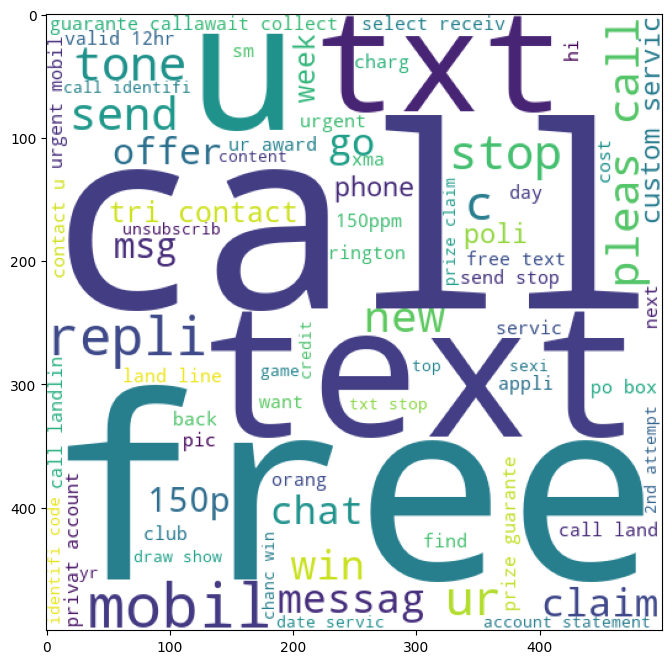

In [98]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

**For ham**

In [99]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

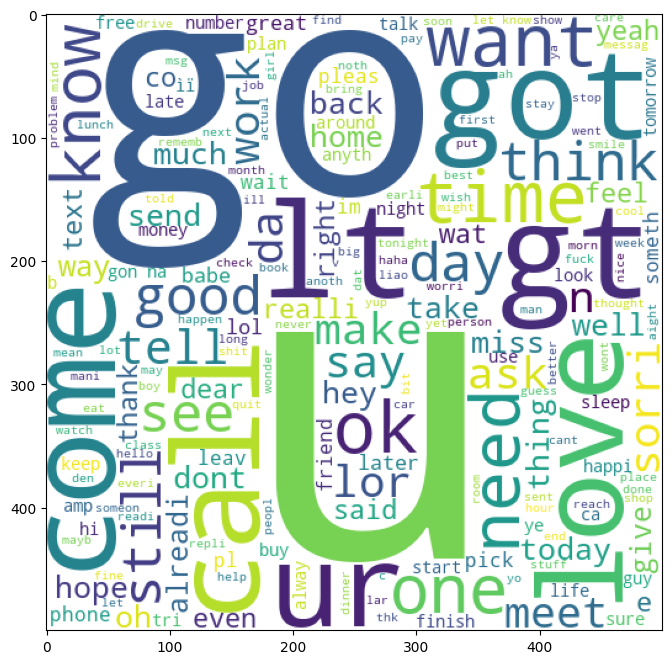

In [100]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

**Top 30 words**

In [101]:
spam_corpus=[]

for msg in df[df['target'] == 1]['transformed_text'].to_list():
    # print(msg)
    for word in msg.split():
        spam_corpus.append(word)

In [102]:
len(spam_corpus)

9883

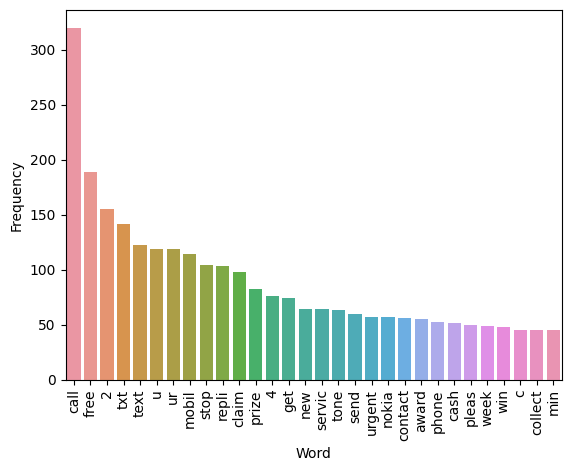

In [103]:
from collections import Counter

# Get the top 30 most common words and convert to a DataFrame
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using sns.barplot with keyword arguments
sns.barplot(x='Word', y='Frequency', data=top_words)

plt.xticks(rotation="vertical")
plt.show()

**For HAM**

In [104]:
ham_corpus=[]

for msg in df[df['target'] == 0]['transformed_text'].to_list():
    # print(msg)
    for word in msg.split():
        ham_corpus.append(word)

In [105]:
len(ham_corpus)

34771

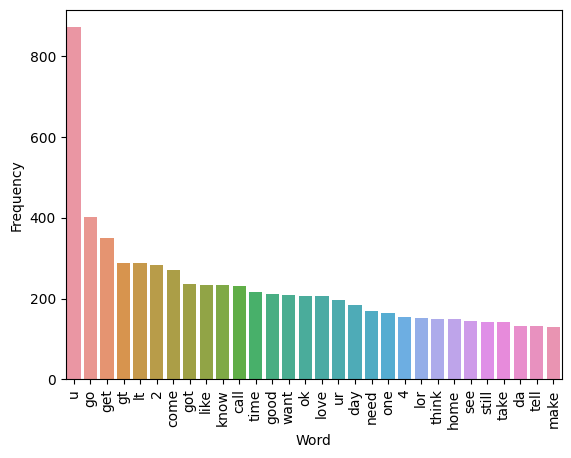

In [106]:
from collections import Counter

# Get the top 30 most common words and convert to a DataFrame
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using sns.barplot with keyword arguments
sns.barplot(x='Word', y='Frequency', data=top_words)

plt.xticks(rotation="vertical")
plt.show()

# 4. Model development

**Text Vectorization using BOWs**

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Naive Bayes Algo**

**Using CountVectorizer for BOWS**

In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [109]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6629)

In [110]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
mnb1 = MultinomialNB()
bnb = BernoulliNB()

In [113]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)


print("accuracy_score :", accuracy_score(y_test, y_pred1))
print("Confusion matrix :",confusion_matrix(y_test, y_pred1))
print("precision score:", precision_score(y_test, y_pred1))

accuracy_score : 0.8597678916827853
Confusion matrix : [[763 126]
 [ 19 126]]
precision score: 0.5


In [114]:
mnb1.fit(X_train, y_train)
y_pred2 = mnb1.predict(X_test)


print("accuracy_score :", accuracy_score(y_test, y_pred2))
print("Confusion matrix :",confusion_matrix(y_test, y_pred2))
print("precision score:", precision_score(y_test, y_pred2))

accuracy_score : 0.9729206963249516
Confusion matrix : [[872  17]
 [ 11 134]]
precision score: 0.8874172185430463


In [115]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)


print("accuracy_score :", accuracy_score(y_test, y_pred3))
print("Confusion matrix :",confusion_matrix(y_test, y_pred3))
print("precision score:", precision_score(y_test, y_pred3))

accuracy_score : 0.9661508704061895
Confusion matrix : [[885   4]
 [ 31 114]]
precision score: 0.9661016949152542


**Using TFIDF**

In [116]:
tfidf = TfidfVectorizer()

In [117]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()
X1.shape

(5169, 6629)

In [118]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X1 = scaler.fit_transform(X1)

In [119]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [120]:
gnb.fit(X1_train, y1_train)
y_pred1 = gnb.predict(X1_test)


print("accuracy_score :", accuracy_score(y_test, y_pred1))
print("Confusion matrix :",confusion_matrix(y_test, y_pred1))
print("precision score:", precision_score(y_test, y_pred1))

accuracy_score : 0.8539651837524178
Confusion matrix : [[763 126]
 [ 25 120]]
precision score: 0.4878048780487805


In [121]:
mnb.fit(X1_train, y_train)
y_pred2 = mnb.predict(X1_test)


print("accuracy_score :", accuracy_score(y_test, y_pred2))
print("Confusion matrix :",confusion_matrix(y_test, y_pred2))
print("precision score:", precision_score(y_test, y_pred2))

accuracy_score : 0.9622823984526112
Confusion matrix : [[888   1]
 [ 38 107]]
precision score: 0.9907407407407407


In [122]:
bnb.fit(X1_train, y_train)
y_pred3 = bnb.predict(X1_test)


print("accuracy_score :", accuracy_score(y_test, y_pred3))
print("Confusion matrix :",confusion_matrix(y_test, y_pred3))
print("precision score:", precision_score(y_test, y_pred3))

accuracy_score : 0.9661508704061895
Confusion matrix : [[885   4]
 [ 31 114]]
precision score: 0.9661016949152542


**Since the precison score is a most relaiable factor in this case the ifidf mnb gives the most proper result of precision score hence we will choose this**

# More Machine Learning ALgo for Comparision


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [124]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [125]:
# dictionary

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [126]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [127]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9342359767891683, 0.7692307692307693)

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9342359767891683
Precision -  0.7692307692307693
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.8874172185430463
For  DT
Accuracy -  0.9245647969052224
Precision -  0.935064935064935
For  LR
Accuracy -  0.9709864603481625
Precision -  0.952755905511811
For  RF
Accuracy -  0.965183752417795
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.9487427466150871
Precision -  0.8382352941176471
For  BgC
Accuracy -  0.9535783365570599
Precision -  0.888
For  ETC
Accuracy -  0.97678916827853
Precision -  1.0
For  GBDT
Accuracy -  0.9352030947775629
Precision -  0.8823529411764706
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9523809523809523


In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [130]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
8,ETC,0.976789,1.000000
5,RF,0.965184,0.990991
4,LR,0.970986,0.952756
10,xgb,0.970019,0.952381
3,DT,0.924565,0.935065
7,BgC,0.953578,0.888000
2,NB,0.972921,0.887417
9,GBDT,0.935203,0.882353
6,AdaBoost,0.948743,0.838235


In [131]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,ETC,Accuracy,0.976789
2,RF,Accuracy,0.965184
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.970019
5,DT,Accuracy,0.924565
6,BgC,Accuracy,0.953578
7,NB,Accuracy,0.972921
8,GBDT,Accuracy,0.935203
9,AdaBoost,Accuracy,0.948743


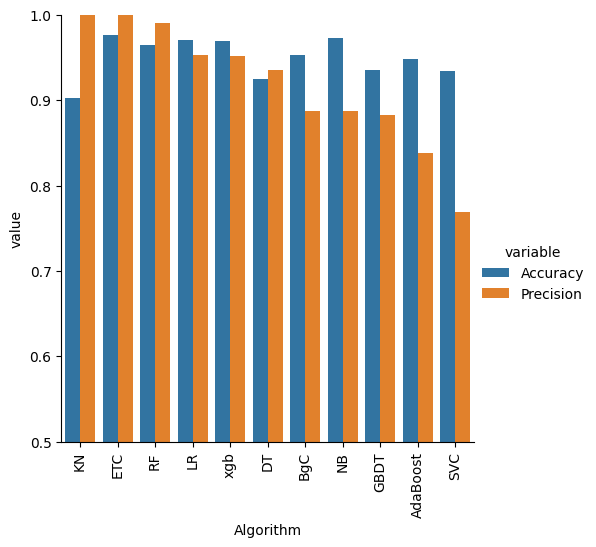

In [132]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [134]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [135]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [136]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [137]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,ETC,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,RF,0.965184,0.990991,0.965184,0.990991,0.965184,0.990991,0.965184,0.990991
3,LR,0.970986,0.952756,0.970986,0.952756,0.970986,0.952756,0.970986,0.952756
4,xgb,0.970019,0.952381,0.970019,0.952381,0.970019,0.952381,0.970019,0.952381
5,DT,0.924565,0.935065,0.924565,0.935065,0.924565,0.935065,0.924565,0.935065
6,BgC,0.953578,0.888000,0.953578,0.888000,0.953578,0.888000,0.953578,0.888000
7,NB,0.972921,0.887417,0.972921,0.887417,0.972921,0.887417,0.972921,0.887417
8,GBDT,0.935203,0.882353,0.935203,0.882353,0.935203,0.882353,0.935203,0.882353
9,AdaBoost,0.948743,0.838235,0.948743,0.838235,0.948743,0.838235,0.948743,0.838235


In [138]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [139]:

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [140]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [141]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 1.0


In [142]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [143]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 0.9925925925925926


In [145]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))